In [1]:
import numpy as np
import glob
import os

# for plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.colors import LogNorm
%matplotlib inline

from PIL import Image 
# Nedded for background fit
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import optimize

# needed for spotfinder
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters

# custom functions
from Image_Formatting import natural_sort
from Image_Formatting import PE_Vals
from Image_Formatting import Image_Converter
from Image_Formatting import FrequencyFilterFunction
from Image_Formatting import FFT_Filter

from Spot_Identification import Unique_Circle
from Spot_Identification import Spot_finder

from Trajectory_Maker import Spot_Area
from Trajectory_Maker import Step_fit
from Trajectory_Maker import Line_fit
from Trajectory_Maker import moving_average
from Trajectory_Maker import Trajectory

In [28]:
def Pull_Data(Dir):
    DataFiles = glob.glob(Dir+'*.tif')
    DataFiles = natural_sort(DataFiles)[0:300]

    Row    = int(250)
    Col    = Row
    Yindex = int(256)
    Xindex = int(256)
    
    FRAMES = {}
    for img in DataFiles:
        DirName    = img.split('/')[-2]
        FileName   = img.split('/')[-1]
        FrameIndex = FileName.split('_')[-1].split('.tif')[0]
        FrameName  = DirName+'_'+FrameIndex
        eOffset, eCoeff = PE_Vals(img)
        ReducedImage = Image_Converter(img, eOffset, eCoeff, Xindex, Yindex, Row, Col)
        FRAMES[FrameName] = ReducedImage

    KEYS = list(FRAMES.keys())
    SUMMEDFFT = np.zeros(Shape**2).reshape((Shape,Shape))
    for keys in KEYS:
        SUMMEDFFT += FRAMES[keys]
    SUMMEDFFT = SUMMEDFFT/len(KEYS)
    data = SUMMEDFFT-np.min(SUMMEDFFT)
    
    return data

In [30]:
data_Link = Pull_Data('/Users/austinmcdonald/Data/031620/Linkers/1/1/')
ypos_Link, xpos_Link  = np.indices(data_Link.shape) 

data_100nM = Pull_Data('/Users/austinmcdonald/Data/031620/100nM/1/2/')
ypos_100nM, xpos_100nM  = np.indices(data_100nM.shape) 

data_1uM = Pull_Data('/Users/austinmcdonald/Data/031620/1uM/1/1/')
ypos_1uM, xpos_1uM  = np.indices(data_1uM.shape) 

data_10uM = Pull_Data('/Users/austinmcdonald/Data/031620/10uM/1/1/')
ypos_10uM, xpos_10uM  = np.indices(data_10uM.shape) 

data_100uM = Pull_Data('/Users/austinmcdonald/Data/031620/100uM/1/1/')
ypos_100uM, xpos_100uM  = np.indices(data_100uM.shape) 

976.6993236000006

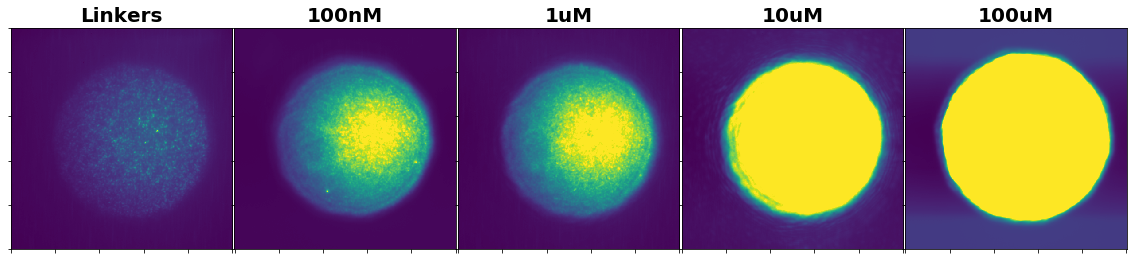

In [77]:
MAX = np.max([np.max(data_Link), np.max(data_100nM), np.max(data_1uM), np.max(data_10uM), np.max(data_100uM)])
MAX=np.max(data_Link)
########################################################
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.0, wspace=0.01)

ax6 = fig.add_subplot(1, 5, 1)
ax6.set_title('Linkers', fontweight="bold", size=20)
ax6.imshow(data_Link, vmin=0, vmax=MAX)

ax7 = fig.add_subplot(1, 5, 2)
ax7.set_title('100nM', fontweight="bold", size=20)
ax7.imshow(data_100nM, vmin=0, vmax=MAX)

ax8 = fig.add_subplot(1, 5, 3)
ax8.set_title('1uM', fontweight="bold", size=20)
ax8.imshow(data_1uM, vmin=0, vmax=MAX)

ax9 = fig.add_subplot(1, 5, 4)
ax9.set_title('10uM', fontweight="bold", size=20)
ax9.imshow(data_10uM, vmin=0, vmax=MAX)

ax10 = fig.add_subplot(1, 5, 5)
ax10.set_title('100uM', fontweight="bold", size=20)
im=ax10.imshow(data_100uM, vmin=0, vmax=MAX)



ax6.set_yticklabels([0],fontsize=0)
ax7.set_yticklabels([0],fontsize=0)
ax8.set_yticklabels([0],fontsize=0)
ax9.set_yticklabels([0],fontsize=0)
ax10.set_yticklabels([0],fontsize=0)
ax6.set_xticklabels([0],fontsize=0)
ax7.set_xticklabels([0],fontsize=0)
ax8.set_xticklabels([0],fontsize=0)
ax9.set_xticklabels([0],fontsize=0)
ax10.set_xticklabels([0],fontsize=0)
plt.show()